In [1]:
import numpy as np
import pandas  as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import folium
from branca.colormap import LinearColormap
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df=pd.read_csv('./Electric_Vehicle_Population_Data.csv')

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166795 non-null  object 
 2   City                                               166795 non-null  object 
 3   State                                              166800 non-null  object 
 4   Postal Code                                        166795 non-null  float64
 5   Model Year                                         166800 non-null  int64  
 6   Make                                               166800 non-null  object 
 7   Model                                              166800 non-null  object 
 8   Electric Vehicle Type                              166800 non-null  object

In [5]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,166795.000000,166800.000000,166800.000000,166800.000000,166440.000000,1.668000e+05,1.667950e+05
mean,98173.713750,2020.341793,61.508993,1152.723171,29.178941,2.172420e+08,5.297709e+10
std,2442.584415,3.001465,93.271747,8661.081091,14.853534,7.727458e+07,1.569754e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.790741e+08,5.303301e+10
50%,98122.000000,2021.000000,0.000000,0.000000,33.000000,2.244045e+08,5.303303e+10
75%,98371.000000,2023.000000,84.000000,0.000000,42.000000,2.513421e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [6]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [7]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 360
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [8]:
df.drop(columns=['Legislative District'], inplace=True)
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [10]:
ev_by_state = df['State'].value_counts()
print(ev_by_state)

State
WA    166435
CA        91
VA        38
MD        32
TX        24
NC        14
IL        13
CO        12
FL        10
HI         9
GA         8
NJ         8
NY         7
CT         7
NV         7
SC         7
AZ         7
OR         6
LA         5
AL         5
DC         4
MA         4
MO         4
PA         4
KY         3
UT         3
OH         3
MI         2
AR         2
ID         2
NE         2
IN         2
KS         2
DE         1
OK         1
MN         1
WY         1
IA         1
RI         1
AK         1
NH         1
Name: count, dtype: int64


In [11]:
ev_by_state_data = {
    'WA': 166435,
    'CA': 91,
    'VA': 38,
    'MD': 32,
    'TX': 24,
    'NC': 14,
    'IL': 13,
    'CO': 12,
    'FL': 10,
    'HI': 9,
    'GA': 8,
    'NJ': 8,
    'NY': 7,
    'CT': 7,
    'NV': 7,
    'SC': 7,
    'AZ': 7,
    'OR': 6,
    'LA': 5,
    'AL': 5,
    'DC': 4,
    'MA': 4,
    'MO': 4,
    'PA': 4,
    'KY': 3,
    'UT': 3,
    'OH': 3,
    'MI': 2,
    'AR': 2,
    'ID': 2,
    'NE': 2,
    'IN': 2,
    'KS': 2,
    'DE': 1,
    'OK': 1,
    'MN': 1,
    'WY': 1,
    'IA': 1,
    'RI': 1,
    'AK': 1,
    'NH': 1
}

capital_coordinates = {
    'WA': [47.7511, -120.7401],
    'CA': [38.5767, -121.4934],
    'VA': [37.5407, -77.4360],
    'MD': [38.9784, -76.4922],
    'TX': [30.2672, -97.7431],

}


m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

colormap = LinearColormap(colors=['#f7f7f7', '#d9f0a3', '#addd8e', '#78c679', '#31a354', '#006837'],
                          vmin=min(ev_by_state_data.values()),
                          vmax=max(ev_by_state_data.values()))

for state, num_ev in ev_by_state_data.items():

    coordinates = capital_coordinates.get(state)
    if coordinates:
        
        folium.Marker(
            location=coordinates,
            popup=f"{state}: {num_ev}",
            icon=None,  # No icon
        ).add_to(m)

colormap.add_to(m)
m

In [12]:
wa_df = df[df['State'] == 'WA']

ev_by_city_wa = wa_df['City'].value_counts()

ev_by_city_wa

City
Seattle      27831
Bellevue      8363
Redmond       6032
Vancouver     5869
Bothell       5440
             ...  
Sprague          1
Glenwood         1
Bell Hill        1
Kenn             1
Stratford        1
Name: count, Length: 468, dtype: int64

In [13]:
map_center = [47.6062, -122.3321]  
m_wa = folium.Map(location=map_center, zoom_start=8)


for city, count in ev_by_city_wa.items():
   
    if city == "Seattle":
        coordinates = [47.6062, -122.3321]  
    elif city == "Bellevue":
        coordinates = [47.6104, -122.2007]  
    elif city == "Redmond":
        coordinates = [47.6739, -122.1215] 
    elif city == "Vancouver":
        coordinates = [45.6318, -122.6716] 
    elif city == "Bothell":
        coordinates = [47.7601, -122.2054]  

    folium.Marker(
        location=coordinates,
        popup=f"{city}: {count}",
        icon=folium.Icon(color='blue')
    ).add_to(m_wa)

m_wa

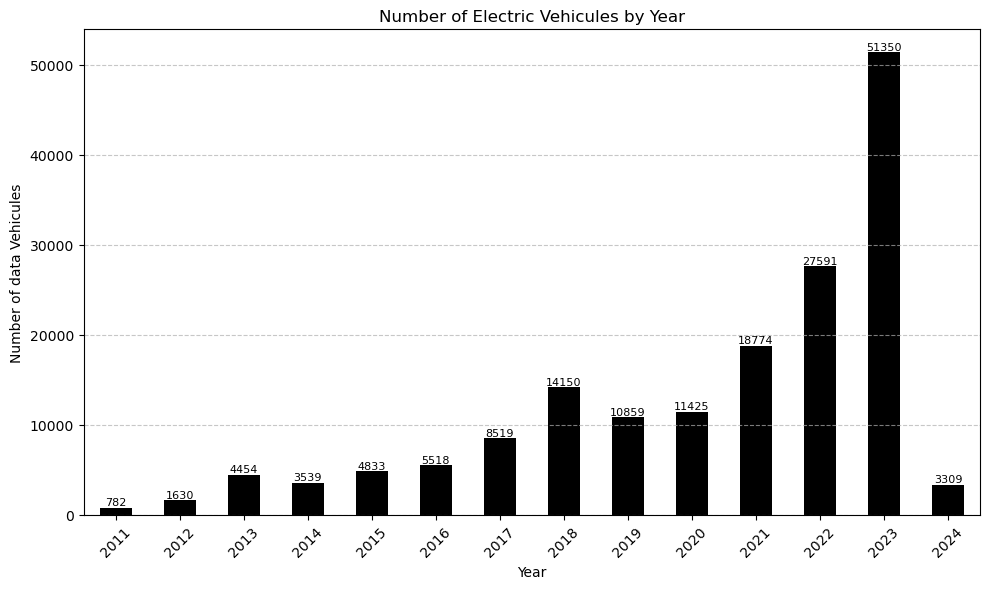

In [14]:
ev_by_year = df.groupby('Model Year').size()
ev_by_year = ev_by_year.reindex(range(2011, ev_by_year.index.max() + 1 ),fill_value=0)
plt.figure(figsize=(10, 6))
bars = ev_by_year.plot(kind='bar',color = 'black')
plt.title('Number of Electric Vehicules by Year')
plt.xlabel('Year')
plt.ylabel('Number of data Vehicules')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--', alpha=0.7)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 ,bar.get_height() + 50, f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()
    
    


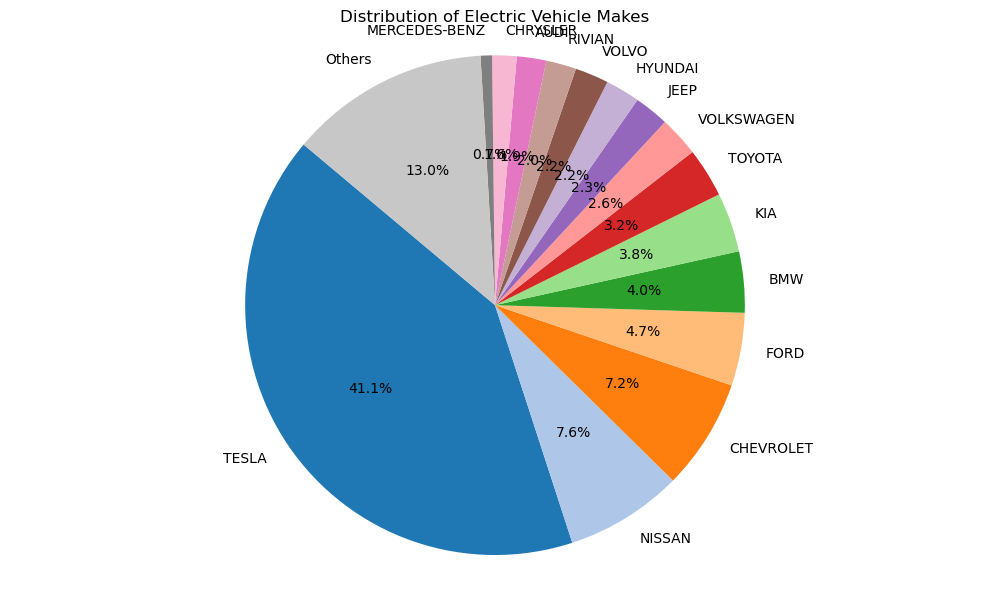

In [15]:
ev_by_make = df['Make'].value_counts()

top_makes = ev_by_make.head(10).index
other_makes_count = ev_by_make[~ev_by_make.index.isin(top_makes)].sum()

ev_by_make_combined = ev_by_make.head(15)
ev_by_make_combined['Others'] = other_makes_count

plt.figure(figsize=(10, 6))
ev_by_make_combined.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Electric Vehicle Makes')
plt.ylabel('')
plt.axis('equal') 
plt.tight_layout()
plt.show()

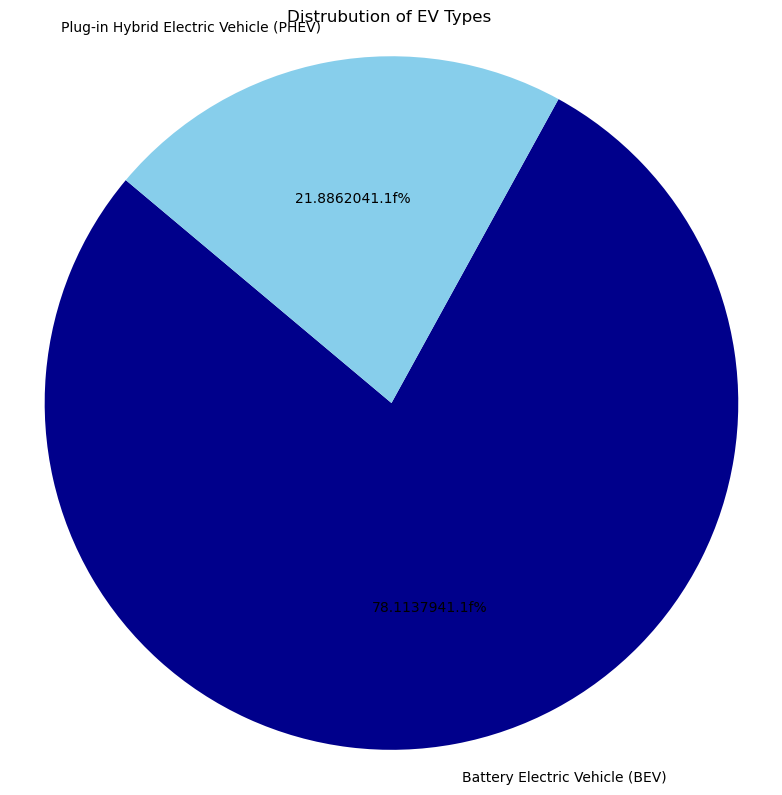

In [16]:
df_EV_types = df["Electric Vehicle Type"].value_counts()
plt.figure(figsize=(8, 8))
df_EV_types.plot(kind='pie',autopct='%f1.1f%%',startangle=140, colors=['darkblue','skyblue'])
plt.title('Distrubution of EV Types ')
plt.ylabel('')
plt.axis('equal')  
plt.tight_layout()
plt.show()

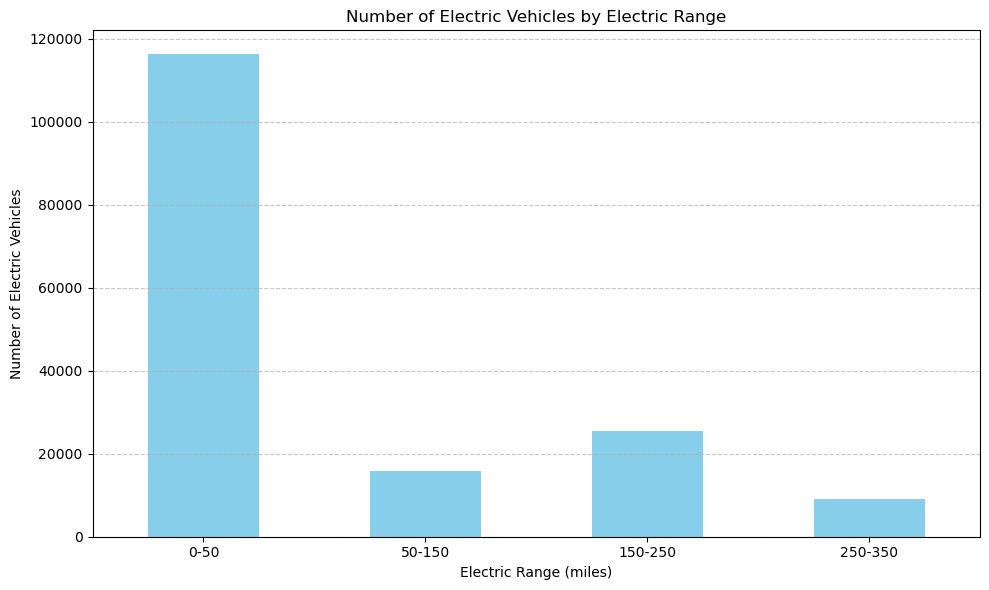

In [17]:
bins = [0, 50, 150, 250, 350]
labels = ['0-50', '50-150', '150-250', '250-350']


electric_range_bins = pd.cut(df['Electric Range'], bins=bins, labels=labels, right=False)

ev_by_range = electric_range_bins.value_counts().sort_index()

plt.figure(figsize=(10, 6))
ev_by_range.plot(kind='bar', color='skyblue')
plt.title('Number of Electric Vehicles by Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

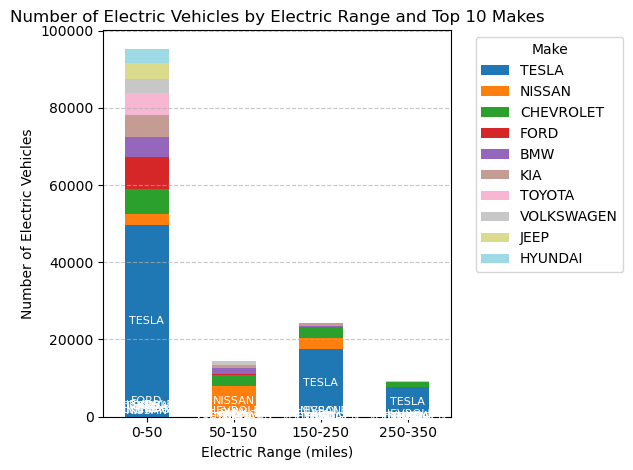

In [18]:
ev_by_range_make = pd.concat([electric_range_bins, df['Make']], axis=1)
ev_by_range_make.columns = ['Electric Range Bin', 'Make']

ev_by_range_make_counts = ev_by_range_make.groupby(['Electric Range Bin', 'Make']).size().unstack(fill_value=0)

top_10_makes = ev_by_range_make_counts.sum().nlargest(10).index

ev_by_range_make_counts_top_10 = ev_by_range_make_counts[top_10_makes]

plt.figure(figsize=(20,15 ))
ev_by_range_make_counts_top_10.plot(kind='bar', stacked=True, cmap='tab20')
plt.title('Number of Electric Vehicles by Electric Range and Top 10 Makes')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=0)
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, label in enumerate(ev_by_range_make_counts_top_10.index):
    for j, value in enumerate(ev_by_range_make_counts_top_10.loc[label]):
        plt.text(i, value / 2, ev_by_range_make_counts_top_10.columns[j], ha='center', va='center', color='white', fontsize=8)

plt.tight_layout()
plt.show()